##Ranked games win prediction##

**League of Legends** is a role play game (RPG by its initials) created by **Riot Games**, in which two teams composed with 5 members each, fight each other in a field called "Summoners Rift". 
In the game, you choose a champion with which you want to play and this champion have a role inside the game which can be:
* **A Tank**, usually a champion who can fight a long time and have a lot of resistence and life.
* **An assassin**, a champion who can defeat very quickly another champ.
* **A fighter**, this kind of champ can fight and deal great damage, maybe a mix between a tank and an assassin.
* **A sorcerer**, sorcerers are great to deal damage and some of them also can heal, protect and buff another champs.

This is a brief summary of the game itself, but also you have different types of games, strategies, ways to win, and ranks. Ranks are measured based on your skills on the game, your wins, basically if you are a good player.


In this project, we will use a data set that contains the first 10 minutes of 10.000 games of one high rank (Diamond players). This is made up of information about objectives fulfilled within those first 10 minutes and we have a variable that determines which one won. Our mission is, with machine learning and this data, predict which team wins, related to which variables with the higher accuracy possible. 

##Project objetive##

Make an exploratory analysis, with the purpose of understand the data set and if some variables have greater weight when it comes to the victory of one team or another.

Later, try to predict the target variable with a machine learning model.


In [27]:
#import libraries
import numpy as np #Numerical Python
import pandas as pd #Procesamiento de datos
import matplotlib.pyplot as plt #Visualización de datos 
import seaborn as sns #Visualización de datos 
import matplotlib #Visualización de datos 


In [28]:
df = pd.read_csv("/content/high_diamond_ranked_10min.csv")
df.head(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.80,17047,197,55,-643,8,19.70,1656.70
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.80,17438,240,52,2908,1173,24.00,1762.00
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.80,17254,203,28,1172,1033,20.30,1728.50
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.00,17961,235,47,1321,7,23.50,1647.80
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.00,18313,225,67,1004,-230,22.50,1740.40


Principal EDA for better understanding

In [29]:
def eda():
  print('Columns names:\n', df.columns)
  print('Columns formats:\n', df.dtypes)
  print('Rows per variable:\n', df.count())
  print('Missing values:\n', df.isnull().sum())
  print('Descriptive statistics:\n', df.describe())

In [30]:
eda()

Columns names:
 Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')
Columns formats:
 gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestr

Text(-1.0, 1.1, 'Distribution')

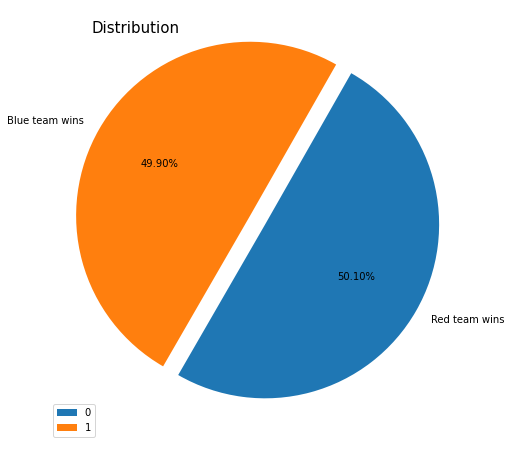

In [71]:
labels = 'Red team wins', 'Blue team wins'
sizes = [15, 30]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')


plt.pie(df["blueWins"].value_counts(),explode=explode, labels=labels,autopct='%1.2f%%',startangle=600)
plt.legend(labels=['0','1'], loc='lower left')

plt.text(-1.0, 1.10,"Distribution",fontsize=15,weight=300)# style='italic')

## Observations:

* The EDA show us that we don't have missing values, this is good because we don't have to deal with missing ones.

* All the variables are numeric

* At this point, we see that the data set is pretty balanced, near to 50/50 of our target variable. Now we have to do another analysis, because we don't know what variable or variables are responsible for one win or lose.

## Multivariate analysis

What are we gonna do? Well, we'll compare all the variables with each other, so we can see what variables have more weight in the final results.

Also, we'll use **Barplot** and **Heatmap** graphs because they will help us, visually, to better understand this point.

Let's go!

In [32]:
#First, define our variable
correlation=df.corr()["blueWins"].drop(index="blueWins").sort_values(ascending=False)

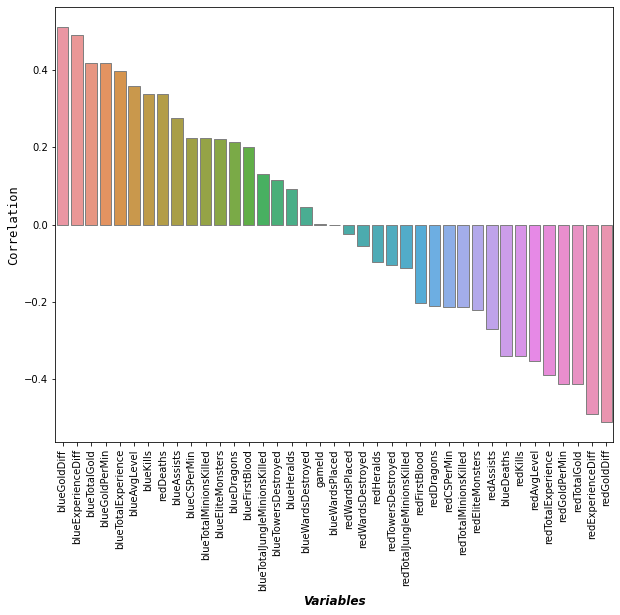

In [33]:
#Creación de barplot 
sns.barplot(x = correlation.index,
            y = correlation.values,edgecolor = 'gray')
#Etiquetas eje X con rotación
plt.xticks(rotation = 90)
plt.xlabel('Variables', size=12, fontstyle='italic', weight=1000)
plt.ylabel('Correlation', size=12, family='monospace')

plt.show()

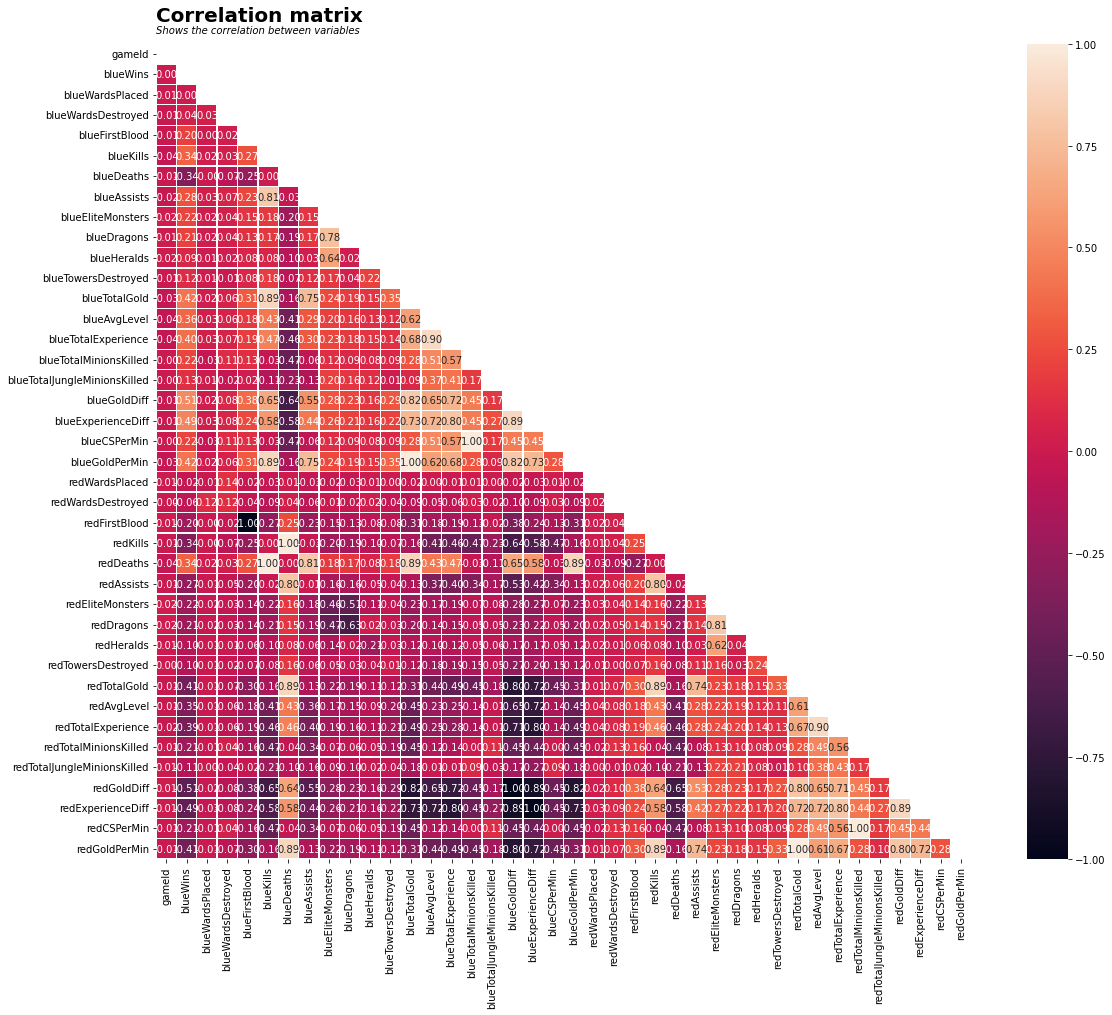

In [34]:
plt.rcParams["figure.figsize"]=(20,15)
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,linewidth=0.3,square=True,fmt='.2f',mask=mask)
plt.text(0,-1.1,"Correlation matrix",fontsize=20,weight=600)
plt.text(0,-0.5,"Shows the correlation between variables",style="italic")
plt.show()
plt.rcParams["figure.figsize"] = (10,8)

This is hard to read so, we want to see only the variables with a correlation greater than 0.8. This will help us understand the relation between some variables.

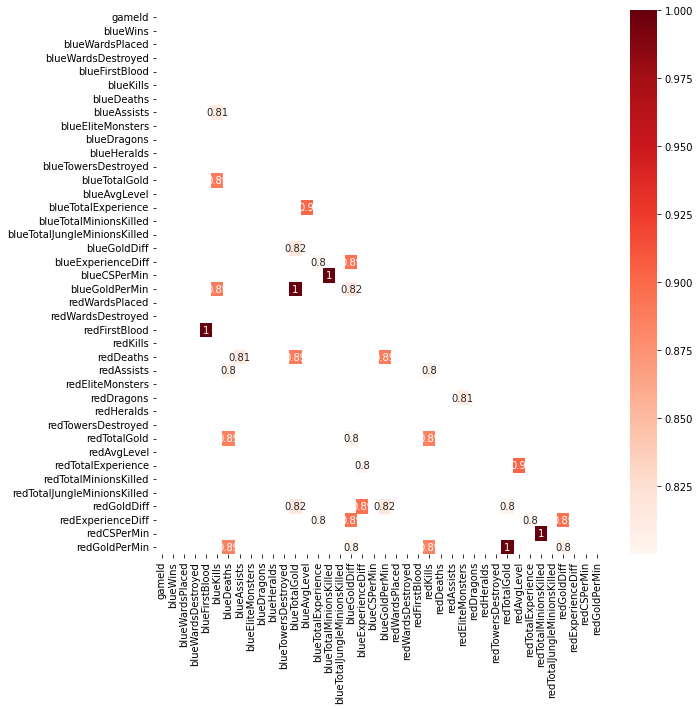

In [35]:
corr_matrix = df.corr().abs()

# change this value as needed, if 0.5 does not work for your scenario
threshold = 0.8

filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 

plt.figure(figsize=(10,10))
sns.heatmap(filtered_corr_df, annot=True, cmap="Reds", mask=mask)
plt.show()

##What now?##
Let's proceed with two new variables, that we'll use to fullfil with the 4 most positive and negative correlation between those and our target variable.  

In [36]:
positive_correlation=df[["blueGoldDiff","blueExperienceDiff","blueGoldPerMin","blueTotalExperience","blueWins"]]
negative_correlation=df[["redGoldDiff","redExperienceDiff","redGoldPerMin","redTotalExperience","blueWins"]]

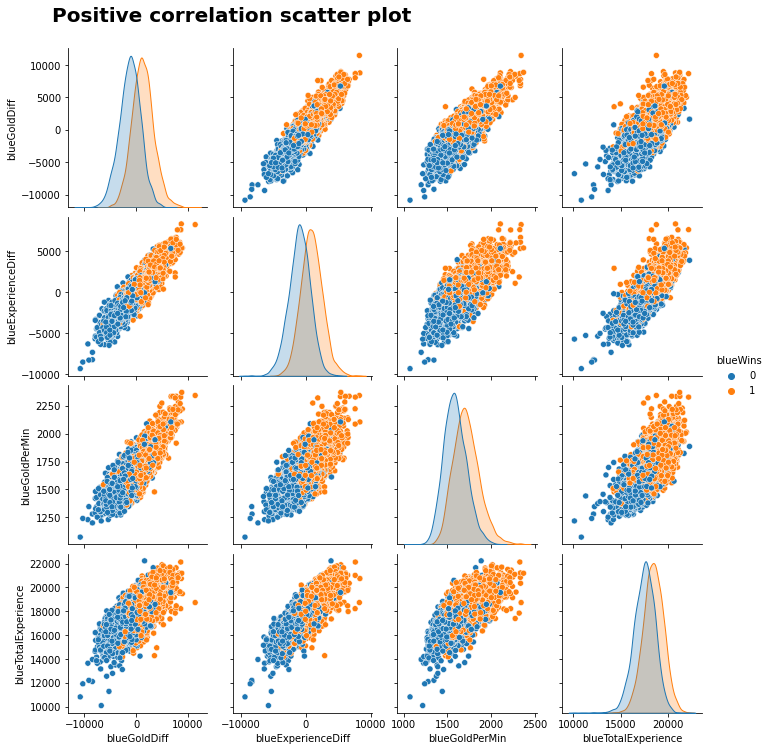

In [37]:
# Graphs of correlation by column to distinguish the target variable
a=sns.pairplot(positive_correlation,hue="blueWins")
a.fig.text(0.075,1.02,"Positive correlation scatter plot",fontsize=20,weight=600)
plt.show()

We can see clearly the differentiation between the target variable. Let's see what happens with the negative correlation.

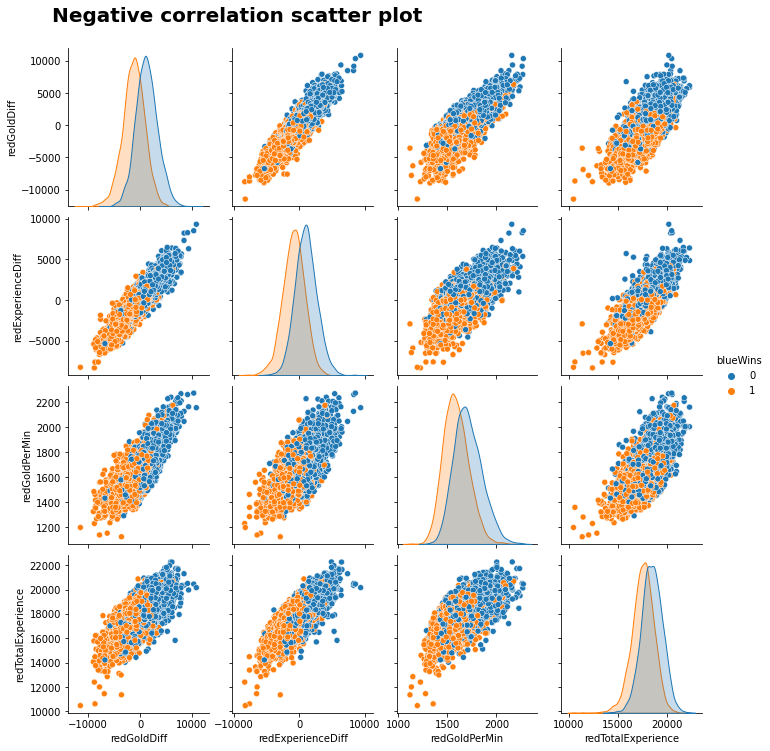

In [38]:
a=sns.pairplot(negative_correlation,hue="blueWins")
a.fig.text(0.075,1.02,"Negative correlation scatter plot",fontsize=20,weight=600)
plt.show()

The same thing happen here, it's easy to see where one or zero is.

##Observations##

At this point we have been analyzing the information, the relationships between the variables and their correlation coefficients. And we can clearly see that these variables have certein weight when it comes to who wins the match. 

So now we must choose a machine learning model to train and see if we can predict this target.

##What's next?##

We are going to use **LazyPredict** library in this first step. LazyPredict will give us a quick screenshot of metrics using each model. This is our first time using this library.

In [39]:
#install lazypredict
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
#import libraries
import lazypredict 
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [41]:
#We slip the data set, "X" will have all the data but the target variable and "y" will have our target "blueWins"
classificacion=df.copy()
X=classificacion.drop("blueWins",axis=1)
y=classificacion.blueWins

In [42]:
#Now we define the size that we'll use for training (70% of the data) and testing (the 30% ramaining for test)
x_train, x_test , y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [44]:
#Let's traing our model and see what it brings to the table
clf = LazyClassifier(verbose=0,ignore_warnings=True)  
X, y = clf.fit(x_train, x_test, y_train, y_test)  
X

100%|██████████| 29/29 [00:37<00:00,  1.30s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.73,0.73,0.73,0.73,0.11
LinearSVC,0.73,0.73,0.73,0.73,1.33
CalibratedClassifierCV,0.73,0.73,0.73,0.73,5.18
LinearDiscriminantAnalysis,0.73,0.73,0.73,0.73,0.17
RidgeClassifier,0.73,0.73,0.73,0.73,0.05
RidgeClassifierCV,0.73,0.73,0.73,0.73,0.07
NearestCentroid,0.73,0.73,0.73,0.73,0.07
SVC,0.73,0.73,0.73,0.73,4.89
BernoulliNB,0.73,0.73,0.73,0.73,0.14


##Observations## 

The search and implementation of this library taught us that the values might be real but we don't have to take those in that way, we have to check the model that we want to use for our project. 

This is only a quick review of the metrics using each prediction model. 

Let's check the first model: **LogisticRegression**

In [51]:
#import metrics libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [53]:
from sklearn.linear_model import LogisticRegression

In [62]:
clf=LogisticRegression(random_state=123,solver='newton-cg')
clf.fit(x_train,y_train)
clf.score(x_train,y_train)
pred=clf.predict(x_test)
print("Accuracy of LogisticRegression model:", round(accuracy_score(y_test,pred)*100,2))

Accuracy of LogisticRegression model: 72.3


In [63]:
y_train_pred=clf.predict(x_train)
y_test_pred=clf.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_test_pred)
print(confusion_matrix)

[[1076  404]
 [ 417 1067]]


**What the confusion matrix tell us?**

* Of the test set, we have 1076 + 1067 correct predictions, the model was able to identify correctly which team win. And 417 + 404 incorrect predictions.
* Let's see it visually below.

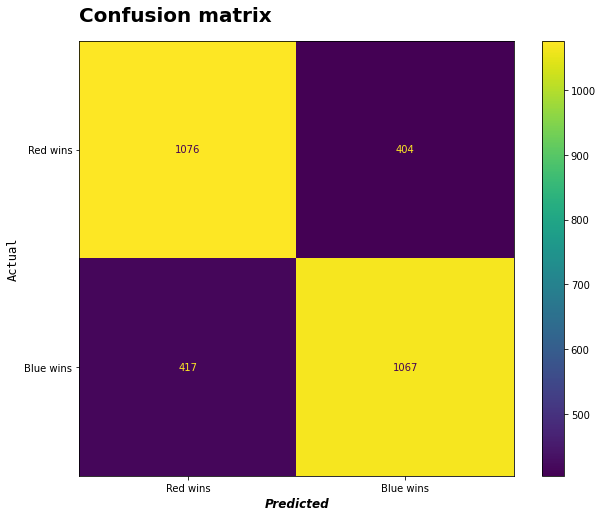

In [66]:
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots()
plot_confusion_matrix(clf, x_test, y_test,ax=ax)
ax.xaxis.set_ticklabels(['Red wins', 'Blue wins']) 
ax.yaxis.set_ticklabels(['Red wins', 'Blue wins']) 
ax.set_xlabel('Predicted', size=12, fontstyle='italic', weight=600)
ax.set_ylabel('Actual',size=12, family='monospace')
ax.text(-0.5,-0.59,"Confusion matrix",fontsize=20,weight=600)

plt.show()

###Let's build the classification report###

This report contains the main metrics and help us to see a summary.

In [68]:
#import classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1480
           1       0.73      0.72      0.72      1484

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



###**ROC curve**###

We will use this tool to understand how good is our model (a good classifier stays as far away from that dot line as possible (toward the top-left corner).

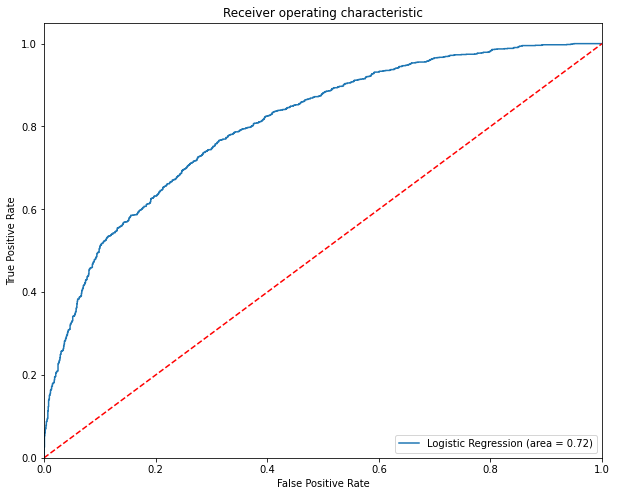

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##Conclusion:##

* Having used lazy predict to understand most of the models that had better performance helped us decide where to aim and where to focus the analysis. This tool was very useful.

* We think that it's possible to improve the model if we have more data. This data set only have nearly **10K rows**, it's pretty small, so if we had more information available the model would improve or it would be nice to see how.

* **72% of accuracy** is good considering the size of our data, so we are happy with this final result.

**Thank you and see you next project**